1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


The eigenvalues:
 [ 2.71091167e+01+0.j -1.48726331e-15+0.j  1.95191384e+00+0.j]

The eigenvectors:
 [[-0.11488421 -0.81649658  0.56580469]
 [-0.57808219 -0.40824829 -0.70650854]
 [-0.80785061  0.40824829  0.42510085]]

The eigenvalues(SVD) :
 [2.71091167e+01 1.95191384e+00 7.15602621e-16]

The eigenvectors(SVD):
 [[-0.11488421  0.56580469 -0.81649658]
 [-0.57808219 -0.70650854 -0.40824829]
 [-0.80785061  0.42510085  0.40824829]] 

[[-0.11488421 -0.57808219 -0.80785061]
 [ 0.56580469 -0.70650854  0.42510085]
 [ 0.81649658  0.40824829 -0.40824829]] 

I don't know why there's a little difference between the result obtained through SVD vs Normal method


C:\Users\Enkidu\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


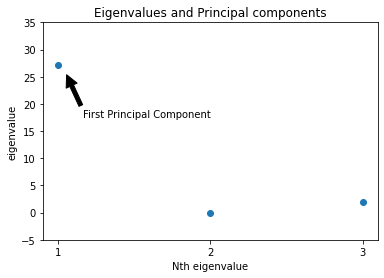

The principal components are resposible for (0.9999999999999999+0j)% of the variability

The x3 data is built totally through the previous x2 and x1 data, so I think it somehow makes sense


Text(0, 0.5, 'New_x3')

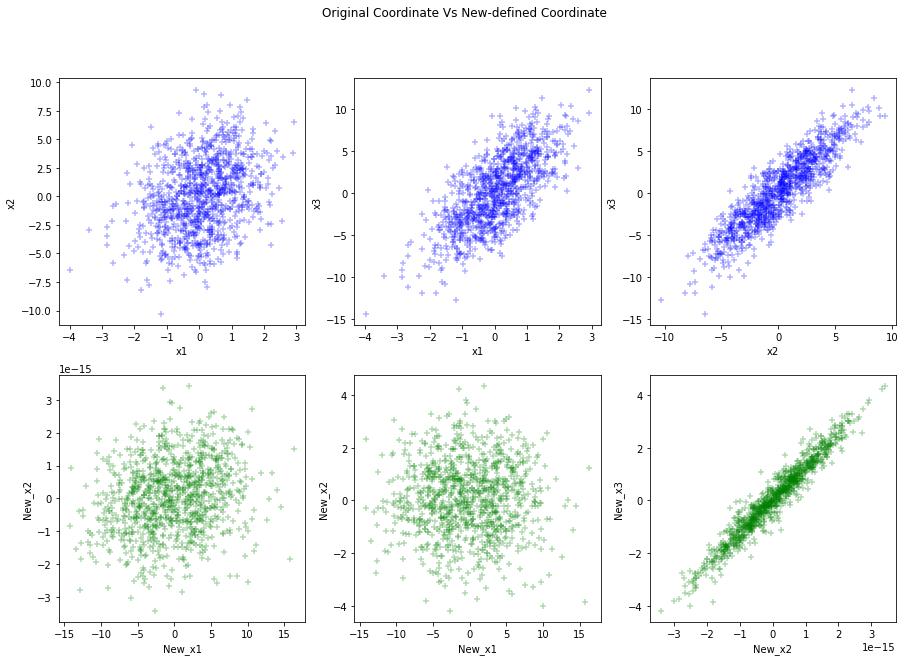

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

np.random.seed(123213)
x1 = np.random.normal(0,1,1000)
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2

data={'x1': x1, 'x2':x2, 'x3':x3}
df = pd.DataFrame(data)  
Cov_Matrix= df.cov()
# print(Cov_Matrix)
l, V = la.eig(Cov_Matrix)
print("The eigenvalues:\n", l)
print("\nThe eigenvectors:\n",V)

U, spectrum, Vt = la.svd(Cov_Matrix)

print ("\nThe eigenvalues(SVD) :\n",spectrum)
print ("\nThe eigenvectors(SVD):\n",U,'\n')
print (Vt,'\n')
print("I don't know why there's a little difference between the result obtained through SVD vs Normal method")

plt.scatter([1,2,3], l)
plt.title("Eigenvalues and Principal components")
plt.annotate('First Principal Component', xy=(1.05, 25.7),  xycoords='data',
            xytext=(0.5, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.xlabel('Nth eigenvalue')
plt.ylabel('eigenvalue')
plt.ylim(-5, 35)
plt.xticks(range(1,4))
plt.show()

print("The principal components are resposible for {}% of the variability\n".format((l[0]+l[2])/(l[1]+l[2]+l[0])))
print("The x3 data is built totally through the previous x2 and x1 data, so I think it somehow makes sense")

#Now we define a new dataframe with containing only principal components
new_df = df.drop(['x3'], axis=1)


X = np.array([x1,x2,x3])
Xp = np.dot(V.T, X)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Original Coordinate Vs New-defined Coordinate')

axs[0,0].scatter(x1, x2, alpha = 0.3, marker='+', color= 'b')
axs[0,0].set_xlabel('x1')
axs[0,0].set_ylabel('x2')
axs[0,1].scatter(x1, x3, alpha = 0.3, marker='+', color= 'b')
axs[0,1].set_xlabel('x1')
axs[0,1].set_ylabel('x3')
axs[0,2].scatter(x2, x3, alpha = 0.3, marker='+', color= 'b')
axs[0,2].set_xlabel('x2')
axs[0,2].set_ylabel('x3')
axs[1,0].scatter(Xp[0], Xp[1], alpha = 0.3, marker='+', color= 'g')
axs[1,0].set_xlabel('New_x1')
axs[1,0].set_ylabel('New_x2')
axs[1,1].scatter(Xp[0], Xp[2], alpha = 0.3, marker='+', color= 'g')
axs[1,1].set_xlabel('New_x1')
axs[1,1].set_ylabel('New_x2')
axs[1,2].scatter(Xp[1], Xp[2], alpha = 0.3, marker='+', color= 'g')
axs[1,2].set_xlabel('New_x2')
axs[1,2].set_ylabel('New_x3')

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The eigenvalues:
 [2.76857752e+01+0.j 1.92289517e-16+0.j 2.18757176e+00+0.j]

The eigenvectors:
 [[-0.11882057 -0.81649658  0.56499115]
 [-0.57314945 -0.40824829 -0.71051604]
 [-0.81079059  0.40824829  0.41946627]]
The principal components are resposible for (1+0j)% of the variability



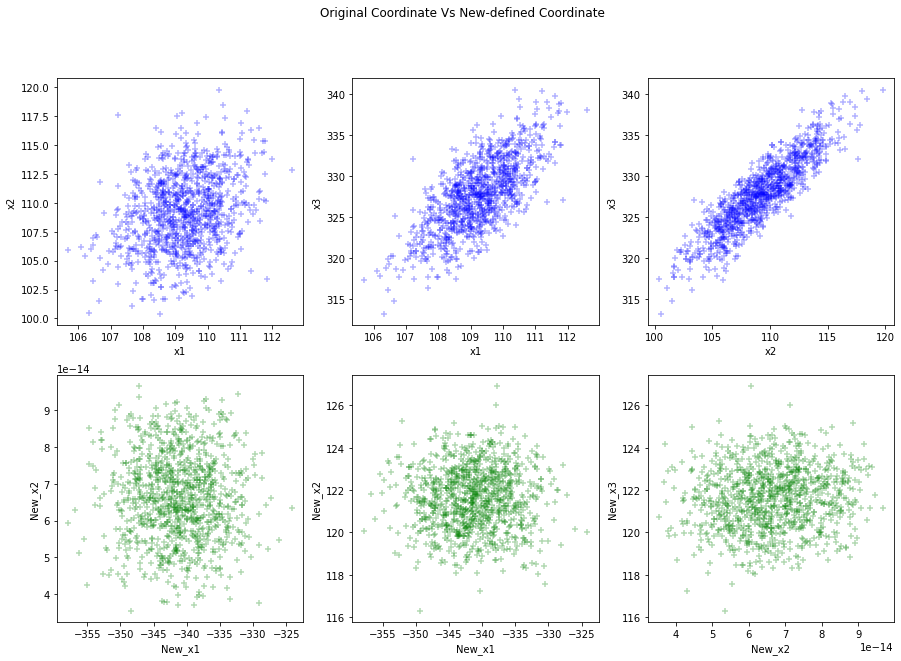

It seems there is no significant difference when add noise


In [2]:
np.random.seed(123238783)

x1 = np.random.normal(0,1,1000)  + np.random.normal(0.05, 1000) #Adding some noise
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2

data={'x1': x1, 'x2':x2, 'x3':x3}

df = pd.DataFrame(data)  
Cov_Matrix= df.cov()
# print(Cov_Matrix)
l, V = la.eig(Cov_Matrix)
print("The eigenvalues:\n", l)
print("\nThe eigenvectors:\n",V)


print("The principal components are resposible for {}% of the variability\n".format((l[0]+l[2])/(l[1]+l[2]+l[0])))

X = np.array([x1,x2,x3])
Xp = np.dot(V.T, X)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Original Coordinate Vs New-defined Coordinate')

axs[0,0].scatter(x1, x2, alpha = 0.3, marker='+', color= 'b')
axs[0,0].set_xlabel('x1')
axs[0,0].set_ylabel('x2')
axs[0,1].scatter(x1, x3, alpha = 0.3, marker='+', color= 'b')
axs[0,1].set_xlabel('x1')
axs[0,1].set_ylabel('x3')
axs[0,2].scatter(x2, x3, alpha = 0.3, marker='+', color= 'b')
axs[0,2].set_xlabel('x2')
axs[0,2].set_ylabel('x3')
axs[1,0].scatter(Xp[0], Xp[1], alpha = 0.3, marker='+', color= 'g')
axs[1,0].set_xlabel('New_x1')
axs[1,0].set_ylabel('New_x2')
axs[1,1].scatter(Xp[0], Xp[2], alpha = 0.3, marker='+', color= 'g')
axs[1,1].set_xlabel('New_x1')
axs[1,1].set_ylabel('New_x2')
axs[1,2].scatter(Xp[1], Xp[2], alpha = 0.3, marker='+', color= 'g')
axs[1,2].set_xlabel('New_x2')
axs[1,2].set_ylabel('New_x3')
plt.show()

print("It seems there is no significant difference when add noise")

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
